In [1]:
import os
import statistics
import time
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest, RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score, recall_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, QuantileTransformer, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.cluster import KMeans
from scipy.stats import gaussian_kde
import matplotlib.dates as mdates


In /home/pedromiguel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pedromiguel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pedromiguel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/pedromiguel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pedromiguel/anaconda3/lib/pytho

In [2]:
dataset_dir="./dataset_labels/"
mac_model_file = "MAC-Model.txt"


In [3]:
file_names=os.listdir(dataset_dir)

In [4]:
df_dict={}
for f in file_names:
    print(f)
    df_dict[f]=pd.read_csv(dataset_dir+f,index_col=False)

feat_gpu_b8_27_eb_0e_9d_fb
feat_gpu_80_1f_02_f1_e3_c0
feat_gpu_80_1f_02_f1_e3_b7
feat_gpu_b8_27_eb_d5_e5_0b
feat_gpu_b8_27_eb_e1_66_63
feat_gpu_e4_5f_01_53_3d_85
feat_gpu_e4_5f_01_53_3e_39
feat_gpu_e4_5f_01_53_3d_49
feat_gpu_dc_a6_32_4c_8e_0a
feat_gpu_b8_27_eb_ea_38_52
feat_gpu_b8_27_eb_c2_b6_e9
feat_gpu_80_1f_02_ef_e7_b2
feat_gpu_b8_27_eb_4c_33_1b
feat_gpu_dc_a6_32_4c_90_fb
feat_gpu_dc_a6_32_e4_48_b3
feat_gpu_b8_27_eb_1d_3b_13
feat_gpu_b8_27_eb_50_d7_8b
feat_gpu_80_1f_02_f1_e3_e0
feat_gpu_dc_a6_32_14_a6_53
feat_gpu_dc_a6_32_e4_48_9e
feat_gpu_e4_5f_01_53_3d_c5
feat_gpu_b8_27_eb_91_48_fe
feat_gpu_80_1f_02_f1_e3_db
feat_gpu_b8_27_eb_6d_af_a9
feat_gpu_80_1f_02_f1_e3_dd
feat_gpu_80_1f_02_f1_e3_b0
feat_gpu_e4_5f_01_53_3f_03
feat_gpu_dc_a6_32_14_a8_d8
feat_gpu_b8_27_eb_31_6d_f3
feat_gpu_dc_a6_32_14_ab_0a
feat_gpu_b8_27_eb_8e_97_06
feat_gpu_dc_a6_32_4c_98_93
feat_gpu_b8_27_eb_7f_ec_53
feat_gpu_80_1f_02_f1_e3_c7
feat_gpu_80_1f_02_f1_e4_0c
feat_gpu_b8_27_eb_2d_d7_6b
feat_gpu_dc_a6_32_4c_99_bf
f

In [36]:
df_concat=pd.concat(df_dict.values())
df_concat.dropna(inplace=True)

In [6]:
#####################Device sample histogram

	 ['80:1f:02:ef:e7:b2' '80:1f:02:f1:e3:b0' '80:1f:02:f1:e3:b7'
 '80:1f:02:f1:e3:c0' '80:1f:02:f1:e3:c7' '80:1f:02:f1:e3:db'
 '80:1f:02:f1:e3:dd' '80:1f:02:f1:e3:e0' '80:1f:02:f1:e4:04'
 '80:1f:02:f1:e4:0c' 'b8:27:eb:0e:9d:fb' 'b8:27:eb:1d:3b:13'
 'b8:27:eb:27:1f:a3' 'b8:27:eb:2d:18:19' 'b8:27:eb:2d:d7:6b'
 'b8:27:eb:31:6d:f3' 'b8:27:eb:4c:33:1b' 'b8:27:eb:4c:53:a8'
 'b8:27:eb:50:d7:8b' 'b8:27:eb:6d:af:a9' 'b8:27:eb:7f:ec:53'
 'b8:27:eb:87:a7:ce' 'b8:27:eb:8c:24:61' 'b8:27:eb:8e:97:06'
 'b8:27:eb:91:48:fe' 'b8:27:eb:c2:b6:e9' 'b8:27:eb:d5:e5:0b'
 'b8:27:eb:dc:61:2f' 'b8:27:eb:e1:66:63' 'b8:27:eb:ea:38:52'
 'dc:a6:32:14:a6:53' 'dc:a6:32:14:a8:d8' 'dc:a6:32:14:ab:0a'
 'dc:a6:32:4c:8e:0a' 'dc:a6:32:4c:90:fb' 'dc:a6:32:4c:98:93'
 'dc:a6:32:4c:99:bf' 'dc:a6:32:4c:9a:79' 'dc:a6:32:e4:48:9e'
 'dc:a6:32:e4:48:b3' 'e4:5f:01:53:3d:49' 'e4:5f:01:53:3d:85'
 'e4:5f:01:53:3d:c5' 'e4:5f:01:53:3e:39' 'e4:5f:01:53:3f:03']      [54863 54891 54879 54866 54800 54880 54853 54864 54878 54866 42588 52583
 525

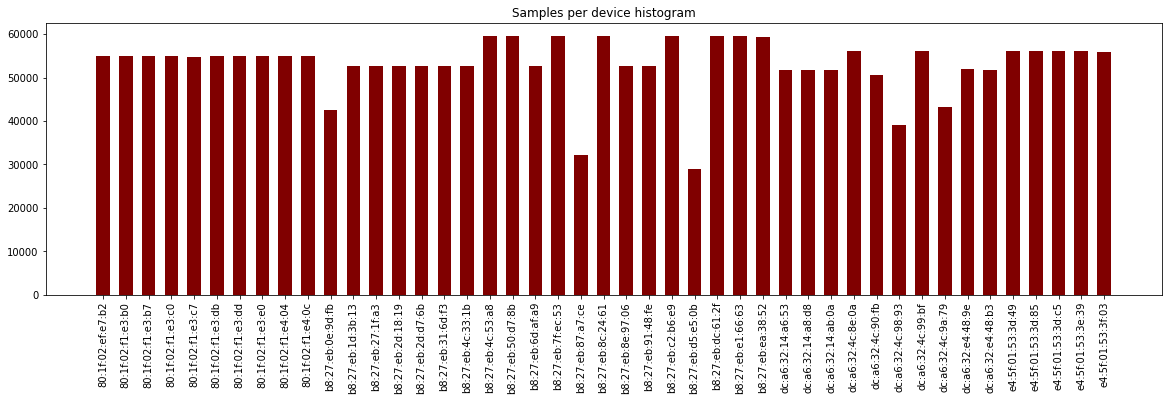

In [7]:
unique_elements, counts_elements = np.unique(df_concat.iloc[:,217], return_counts=True)
print("\t",unique_elements,"    ",counts_elements)
fig = plt.figure(figsize = (20, 5))
plt.bar(unique_elements,counts_elements, color ='maroon',
        width = 0.6)
plt.title('Samples per device histogram')
plt.xticks(rotation = 90)
plt.show()
fig.savefig('samples_histogram.pdf', bbox_inches = "tight")

In [8]:
df_concat['timestamp'] = df_concat['timestamp'].apply(lambda x: mdates.epoch2num(x))

In [9]:
df_corr1=df_concat[df_concat['label'].str.contains("0_")]
df_corr2=df_concat[df_concat['label'].str.contains("1_")]
df_corr3=df_concat[df_concat['label'].str.contains("3_")]
df_corr4=df_concat[df_concat['label'].str.contains("4_")]

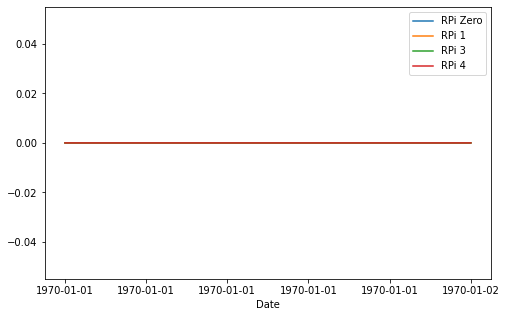

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

n,x = np.histogram(df_corr1["timestamp"],bins=2400)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n, label="RPi Zero") ## using bin_centers rather than edges

n,x = np.histogram(df_corr2["timestamp"],bins=2400)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n, label="RPi 1") ## using bin_centers rather than edges

n,x = np.histogram(df_corr3["timestamp"],bins=2400)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n, label="RPi 3") ## using bin_centers rather than edges

n,x = np.histogram(df_corr4["timestamp"],bins=2400)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n, label="RPi 4") ## using bin_centers rather than edges



myFmt = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(myFmt)
ax.set_xlabel("Date")
fig.savefig('samples_per_hour.pdf', bbox_inches = "tight")
plt.legend()
plt.show()

In [11]:
######################## Model identification experiments based on clustering

In [40]:
df_Y=df_concat.iloc[:,-1:]
df_X=df_concat.iloc[:,2:-1]

In [41]:
mac_model = {}
with open(mac_model_file) as f:
    for line in f:
        p = line.split(" ")
        mac_model[p[0]] = p[3]
df_Y = df_Y["label"].apply(lambda x: mac_model[str(x)])#mac_model[str(x)]+ "_" + str(x))

In [42]:
scc = MinMaxScaler()
scc.fit(df_X)
df_X = scc.transform(df_X)

In [43]:
pca = PCA(n_components=8)

principalComponents = pca.fit_transform(df_X)

In [44]:
kmean= KMeans(4)
kmean.fit(principalComponents)

KMeans(n_clusters=4)

In [45]:
labels=kmean.labels_

In [46]:
df = pd.DataFrame({'x': principalComponents[:,0], 'y':principalComponents[:,1], 'label':labels, 'm':df_Y}) 

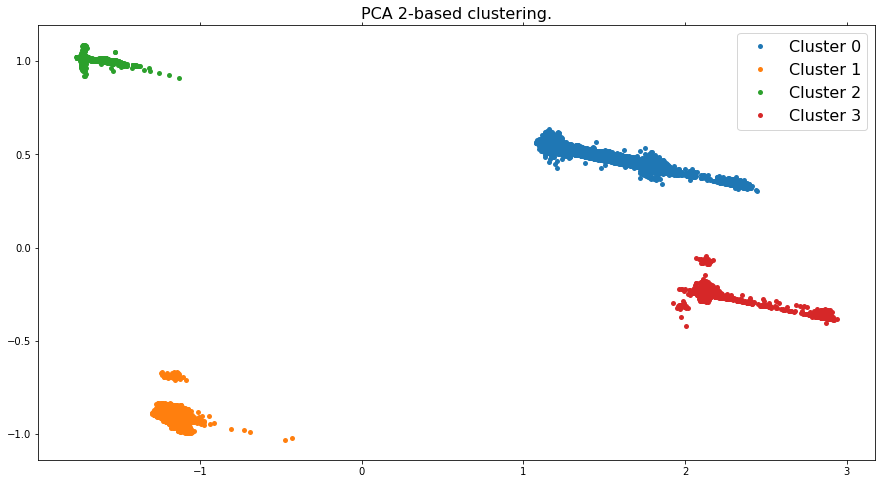

In [50]:
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 8)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, mec='none',label="Cluster "+str(name))
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off')
    
ax.legend(prop={'size': 16})
ax.set_title("PCA 2-based clustering.", fontsize=16)
plt.show()
fig.savefig('PCA-clustering.png', bbox_inches = "tight")


In [ ]:
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print("\t",unique_elements,"    ",counts_elements)

In [ ]:
unique_elements, counts_elements = np.unique(df_Y, return_counts=True)
print("\t",unique_elements,"    ",counts_elements)

In [ ]:
#################Individual classification

In [ ]:
df_concat=pd.concat(df_dict.values())

In [ ]:
df_Y=df_concat.iloc[:,-1:]
df_Y.columns=[0]
df_X=df_concat.iloc[:,1:-1]

In [ ]:
mac_model = {}
with open(mac_model_file) as f:
    for line in f:
        p = line.split(" ")
        mac_model[p[0]] = p[3]
df_Y = df_Y["label"].apply(lambda x: mac_model[str(x)]+ "_" + str(x))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,shuffle=True)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, bootstrap=False, n_jobs=6, random_state=42)
#rf = DecisionTreeClassifier()
#rf = XGBClassifier(max_depth= 20, learning_rate= 0.1, gamma= 0.01, colsample_bytree= 0.5, n_jobs=8)
#rf = KNeighborsClassifier(n_neighbors=7)
#rf = GaussianNB()
#rf = svm.SVC(kernel='linear')
#rf=MLPClassifier([50],batch_size=512,verbose=True,max_iter=100,shuffle=True)

In [ ]:
scc = MinMaxScaler()
scc.fit(X_train)
X_train = scc.transform(X_train)
X_test = scc.transform(X_test)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
pred = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)
print("Accuracy: {}".format(accuracy))

In [ ]:
accuracy = rf.score(X_test, y_test)
print("Accuracy: {}".format(accuracy))
report=classification_report(y_test, pred, target_names=rf.classes_)
print(report)

In [ ]:
array = confusion_matrix(y_test, pred)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
array = array.round(2)
df_cm = pd.DataFrame(array)

In [ ]:
fig = plt.figure(figsize = (18,18))
#fig, ax = plt.subplots(figsize=(35, 35))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g', xticklabels=rf.classes_, yticklabels=rf.classes_, cbar=False)
#sn.set(font_scale=1.4)
plt.yticks(rotation=0)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#    label.set_fontsize(12)
#plt.rc('xtick', labelsize=50)
#plt.rc('ytick', labelsize=50)
plt.show()
fig.savefig('classification_matrix.pdf', bbox_inches = "tight")

In [ ]:
feat_labels=X_train.columns
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

In [ ]:
############### Temperature correlation

In [17]:
mac_model = {}
with open(mac_model_file) as f:
    for line in f:
        p = line.split(" ")
        mac_model[p[0]] = p[3]
df_concat['label'] = df_concat['label'].apply(lambda x: mac_model[str(x)]+ "_" + str(x))

In [18]:
df_RPi4=df_concat[df_concat['label'].str.contains("4_")]

In [19]:
df_corr1=df_dict["feat_gpu_80_1f_02_f1_e3_b0"].iloc[:,:] # RPi Zero
corr1 = df_corr1.corr()


df_corr2=df_dict["feat_gpu_b8_27_eb_6d_af_a9"].iloc[:,:] # RPi 1
corr2 = df_corr2.corr()

df_corr3=df_dict["feat_gpu_b8_27_eb_ea_38_52"].iloc[:,:] # RPi 3
corr3 = df_corr3.corr()

df_corr4=df_dict["feat_gpu_dc_a6_32_4c_90_fb"].iloc[:,:] # RPi 4
corr4 = df_corr4.corr()

In [20]:
c=list(range(2,18))+[117]

In [30]:
temp_correlation_lines=[corr1.iloc[c,1], corr2.iloc[c,1],corr3.iloc[c,1],corr4.iloc[c,1]]

In [31]:
temp_correlation_lines[0].rename({"gpu_sum":"gpu_matrixsum"},inplace=True)
temp_correlation_lines[1].rename({"gpu_sum":"gpu_matrixsum"},inplace=True)
temp_correlation_lines[2].rename({"gpu_sum":"gpu_matrixsum"},inplace=True)
temp_correlation_lines[3].rename({"gpu_sum":"gpu_matrixsum"},inplace=True)

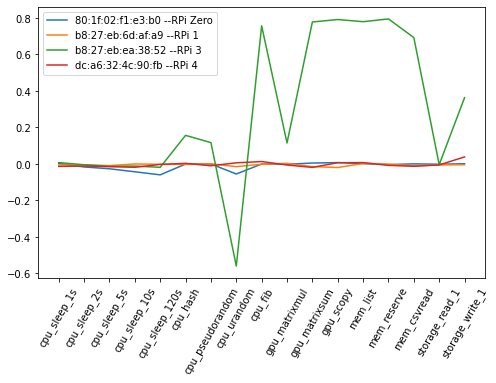

In [32]:
fig, ax = plt.subplots(figsize=(8, 5)) 
plt.plot(temp_correlation_lines[0], label= "80:1f:02:f1:e3:b0 --RPi Zero")
plt.plot(temp_correlation_lines[1], label= "b8:27:eb:6d:af:a9 --RPi 1")
plt.plot(temp_correlation_lines[2], label= "b8:27:eb:ea:38:52 --RPi 3")
plt.plot(temp_correlation_lines[3], label= "dc:a6:32:4c:90:fb --RPi 4")
ax.legend()
plt.xticks(rotation = 60)
plt.show()
fig.savefig('temp_correlation.pdf', bbox_inches = "tight")

In [ ]:
############### Inter-device performance comparison

In [ ]:
df_RPi4=df_concat[df_concat['label'].str.contains("4_")]

In [ ]:
np.unique(df_RPi4["label"].values)

In [ ]:
feats=["cpu_sleep_120s", "gpu_matrixmul", "storage_read_1", "storage_write_1"]

In [ ]:
colors=["b","g","r","m","y","k","c","olivedrab","brown","darkorchid","orange","silver","pink","slategray","peru"]
for f in feats:
    fig, ax = plt.subplots(figsize=(8, 6)) 
    c=0
    for d in np.unique(df_RPi4["label"].values):
        vals=df_RPi4[df_RPi4["label"].str.contains(d)][f]
        vals=vals[(vals>vals.quantile(0.05)) & (vals<vals.quantile(0.95))]
        sn.kdeplot(vals, bw=0.5, label=d,color=colors[c])#, label=str(n % 5 + 1)
        c=c+1
    
    ax.set_xlabel(f)
    plt.show()
    fig.savefig('inter-device_'+f+'.pdf', bbox_inches = "tight")